# SyriaTel Customer Churn Project

## Overview
This project seeks to predict customer churn for SyriaTel using historical usage and customer service data. By leveraging classification models, we aim to detect patterns that distinguish churners from loyal customers. The end goal is to empower the business with proactive strategies to reduce churn and retain high-value customers. The full machine learning lifecycle is followed—from problem framing and data exploration to model development and business recommendations.

## Business Understanding
#### Problem statement
SyriaTel wants to understand and reduce customer churn. The company needs a way to identify customers who are likely to leave so that appropriate interventions can be applied (e.g. loyalty programs, special offers).
#### Stakeholders:
- Retention and Marketing Teams: need precise predictions to launch targeted retention campaigns.

- Executives: seek KPIs around churn mitigation and revenue protection.
#### Success Criteria: 
- High recall and precision for identifying churners.
- Interpretability to ensure actionable strategies.
- Practical business recommendations derived from model output.

## Data Understanding

In [131]:
# 1. Imports relevant libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE

In [132]:
# 2. Load Data
df = pd.read_csv("bigml_59c28831336c6604c800002a.csv")

# 3. Display the first few rows of the DataFrame
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [133]:
# 4. Display information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [134]:
# 5. Display summary statistics of the DataFrame
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [135]:
# 6. Display the shape of the DataFrame
df.shape

(3333, 21)

The dataset includes 3,333 customers with features such as:

- Demographics: state, area code

- Service details: international plan, voice mail plan

- Usage metrics: daily, evening, night, and international minutes, calls, and charges

- Support history: number of customer service calls

- Target variable: churn (binary)

#### Initial Observations:

- Class imbalance: Majority class is non-churners (~86%)

- Potential multicollinearity: minutes and charges are highly correlated

- Some features (e.g. phone number) are identifiers and not predictive



## Data Preprocessing

### Data Cleaning
Data cleaning will involve dropping irrelevant columns, checking for duplicates and missing values and if duplicates or missing values are present in the data, action will be taken and also converting datatypes wherever necessary.

In [136]:
# 7. Drop irrelevant columns
df = df.drop(["phone number", "area code"], axis=1)

In [137]:
# 8. Check for duplicates
duplicates = df.duplicated().sum()
print("Number of duplicate rows:", duplicates)


Number of duplicate rows: 0


There are no duplicated rows in the data.

In [138]:
# 9. Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 state                     0
account length            0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64


There are no missing values in the data.

In [ ]:
# 10. Encode categorical variables
binary_cols = ["international plan", "voice mail plan"]
for col in binary_cols:
    df[col] = df[col].map({'no': 0, 'yes': 1})

# Encode state with LabelEncoder
le = LabelEncoder()
df["state"] = le.fit_transform(df["state"])

# 11. Convert boolean to integer
#df['churn'] = df['churn'].astype(int)


#### Steps Taken:
1. Cleaning:

- Dropped phone number and area code as they have no predictive values.

- Checked and confirmed no duplicates or missing values.

2. Encoding:

- Binary features like international plan and voice mail plan are encoded into 0/1.

- The state column is label-encoded to numeric form.

3. Separate target and features:
- Separated the target variable, churn, from features.
- Converted churn variable from boolean to integer data type.

### Exploratory Data Analysis

#### Univariate Analysis

##### 1. Categorical Feature Distribution

We'll start by visualizing the distribution of key categorical features using pie charts for a more visual representation of proportions.

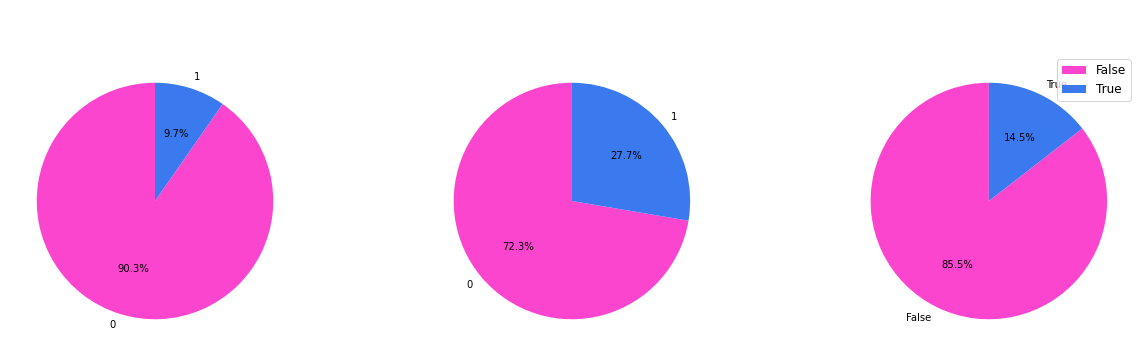

In [140]:
cat_features = ['international plan', 'voice mail plan', 'churn']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, col in enumerate(cat_features):
    proportions = df[col].value_counts(normalize=True)
    labels = proportions.index.map(str)
    axes[i].pie(proportions, labels=labels, autopct='%1.1f%%', startangle=90, colors = ["#fc45ce","#3a79ee"])
    axes[i].set_title(f'{col.title()} Distribution', fontsize=14, fontweight='bold', color='white')

plt.legend(loc= 'upper right', fontsize=12)
plt.suptitle('Categorical Feature Distribution', fontsize=16, fontweight='bold', color='white')
plt.subplots_adjust(top=0.85)
plt.tight_layout()
plt.show()

##### Observations:
- Most customers do not subscribe to the international or voicemail plan.

- Churned customers represent a small minority, confirming a class imbalance issue.

##### 2. Numerical Feature Distribution

We’ll explore numerical features using ridge plots for more layered insight into their distributions.

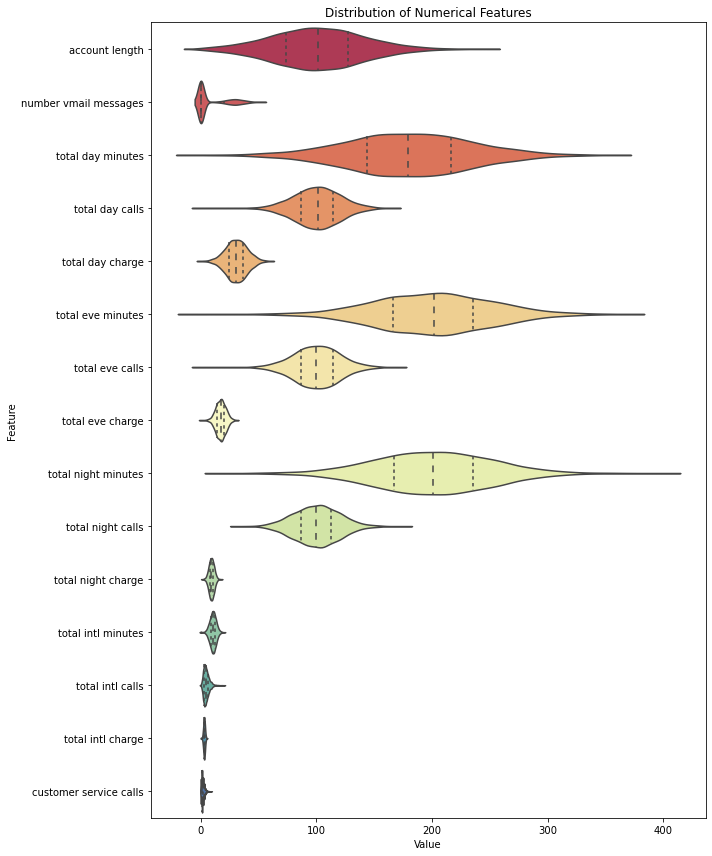

In [141]:

# Exclude some non-numeric columns and target
num_columns = df.drop(columns=['phone number', 'state', 'churn', 'international plan', 'voice mail plan'], errors='ignore').select_dtypes(include=['int64', 'float64']).columns

# Create a melt DataFrame for seaborn
df_melted = df[num_columns].melt(var_name='Feature', value_name='Value')

plt.figure(figsize=(10, 12))
sns.violinplot(data=df_melted, x='Value', y='Feature', palette='Spectral', scale='width', inner='quartile')
plt.title('Distribution of Numerical Features')
plt.tight_layout()
plt.show()


##### Observations:
- Account length is symmetrically distributed, suggesting a stable average customer lifespan.

- Voicemail messages are mostly zero, highlighting limited use.

- Distributions of minute and charge-based features are quite similar and normally shaped.

- Customer service calls show a right-skew with a few customers calling frequently—a potential churn signal.

#### Multivariate Analysis

##### 3. Churn Distribution by Plan Subscription
Here, we analyze how subscription to specific services relates to churn using grouped bar charts.

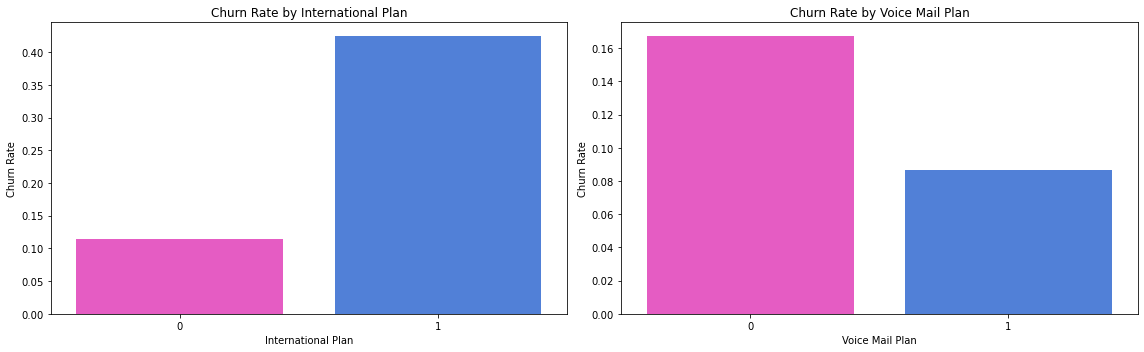

In [142]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

for i, feature in enumerate(['international plan', 'voice mail plan']):
    sns.barplot(data=df, x=feature, y='churn', estimator=lambda x: sum(x)/len(x), ci=None, ax=axes[i], palette=["#fc45ce", "#3a79ee"])
    axes[i].set_title(f'Churn Rate by {feature.title()}')
    axes[i].set_ylabel('Churn Rate')
    axes[i].set_xlabel(feature.title())

plt.tight_layout()
plt.show()


##### Key Insights:
- Churn is more prevalent among users with the international plan, potentially due to cost sensitivity.

- Customers with a voice mail plan exhibit a lower churn rate, possibly indicating higher engagement.



##### 4. Numerical Features vs. Churn
We now explore numerical features by churn class using box plots for visual granularity.

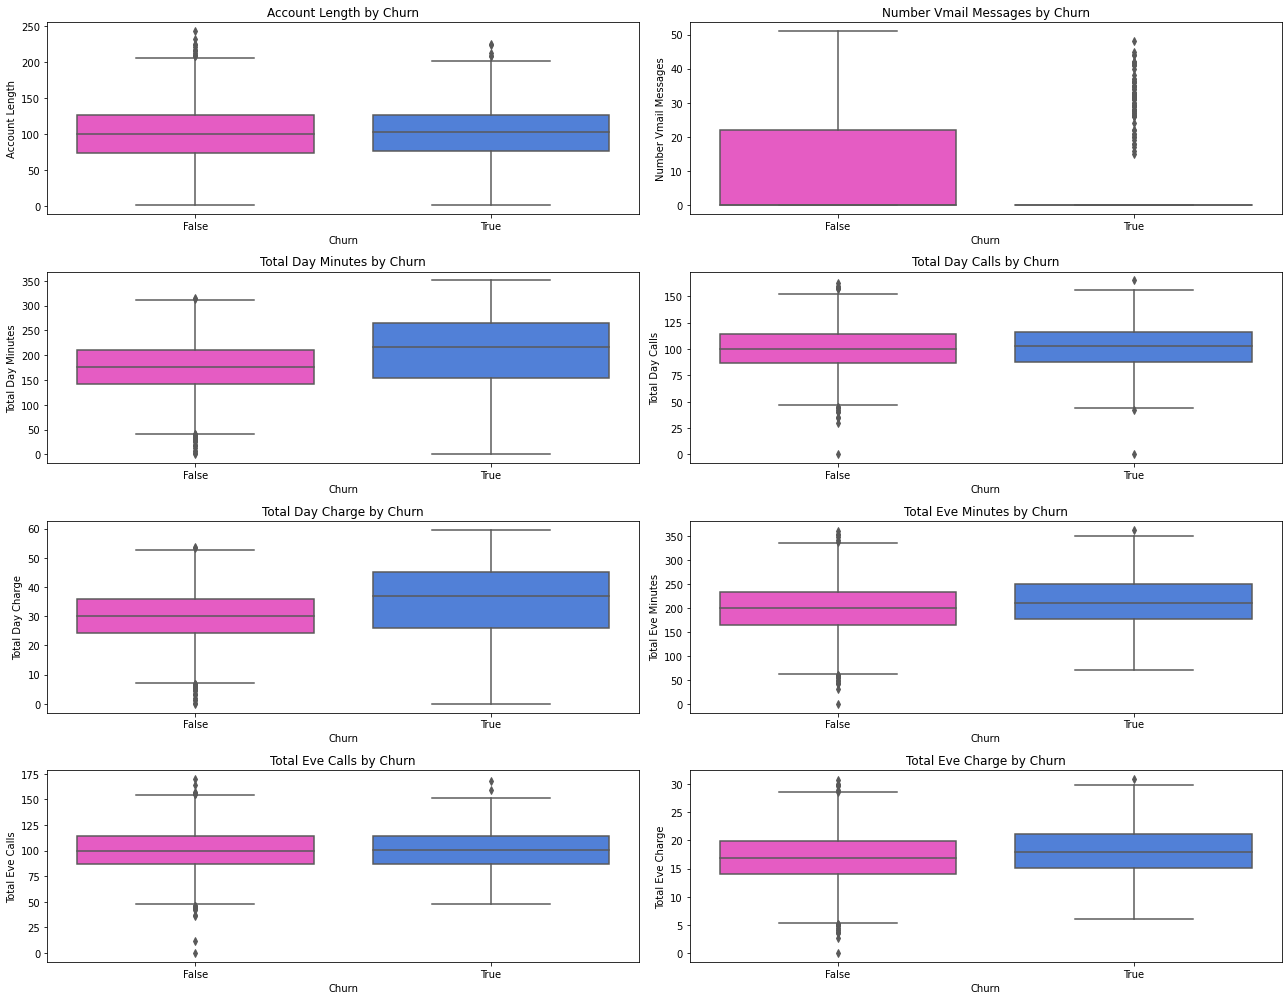

In [143]:
fig, axes = plt.subplots(4, 2, figsize=(18, 14))

for i, col in enumerate(num_columns[:8]):
    sns.boxplot(x='churn', y=col, data=df, ax=axes[i // 2, i % 2], palette=["#fc45ce", "#3a79ee"])
    axes[i // 2, i % 2].set_title(f'{col.title()} by Churn')
    axes[i // 2, i % 2].set_xlabel('Churn')
    axes[i // 2, i % 2].set_ylabel(col.title())

plt.tight_layout()
plt.show()

##### Analysis:
- Total charges and minutes are slightly higher for churners.

- Customer service calls show a strong positive correlation with churn.

- Voicemail message counts are low overall but even lower among churners.

#### Correlation Analysis

##### 5. Correlation Heatmap & Redundancy Reduction
We’ll analyze correlation among features to identify multicollinearity.

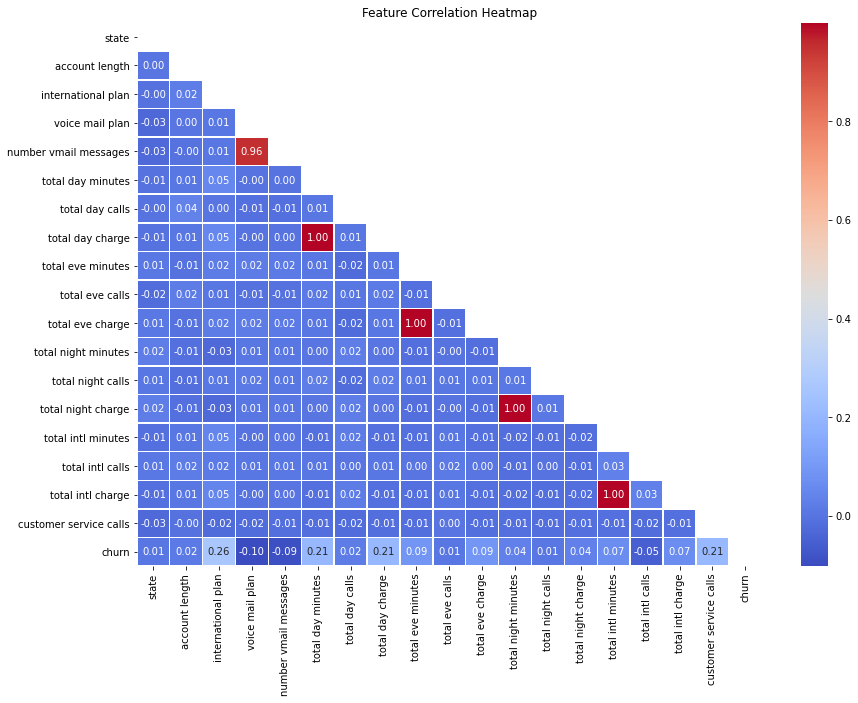

In [144]:
plt.figure(figsize=(14, 10))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()


In [145]:
# Drop highly correlated pairs
corr_matrix = df.corr().abs()
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
drop_cols = [col for col in upper_triangle.columns if any(upper_triangle[col] > 0.95)]

print("Highly correlated columns to drop:", drop_cols)

df.drop(columns=drop_cols, inplace=True)


Highly correlated columns to drop: ['number vmail messages', 'total day charge', 'total eve charge', 'total night charge', 'total intl charge']


##### Interpretation: 
- Total minutes and charges are almost perfectly correlated → keeping only one avoids redundancy.

- Customer service calls, international plan, and total day minutes have stronger relationships with churn.

#### Train Test Split

In [ ]:

# Separate target variable and features
X = df.drop("churn", axis=1)
y = df["churn"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#### Class Imbalance Problem
In our dataset, the churn variable is highly imbalanced—non-churned customers dominate the dataset. This imbalance may bias models like Logistic Regression, which tend to favor the majority class, leading to poor recall for churners.

To tackle this, we’ll apply SMOTE (Synthetic Minority Over-sampling Technique) on the training data. SMOTE generates new synthetic examples for the minority class based on feature similarity, helping our model better recognize patterns from limited churn cases.



##### SMOTE Implementation

In [154]:
# Identify categorical columns
categorical_features = ['international plan', 'voice mail plan']

# Apply SMOTE-N for mixed-type datasets (categorical + numerical)
smoten = SMOTE(random_state=0)
X_train_res, y_train_res = smoten.fit_resample(X_train, y_train)

# Show the new class distribution
print("Before Resampling:", y_train.value_counts().to_dict())
print("After Resampling:", y_train_res.value_counts().to_dict())


Before Resampling: {False: 2280, True: 386}
After Resampling: {True: 2280, False: 2280}


##### Outcome:
- The number of churned and non-churned customers in the training set is now balanced.

- This creates a more equitable training environment for classification models.

#### Standardization

In [ ]:

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_bal)
X_test_scaled = scaler.transform(X_test)

3. Feature Engineering & Multicollinearity Check:

- Decided to retain either minutes or charges columns (not both).

- Considered aggregating call counts and charges into summaries.

4. Class Imbalance Handling:

- Used SMOTE to balance the training dataset.

5. Scaling:

- Applied StandardScaler for algorithms sensitive to magnitude (e.g., Logistic Regression, SVM).

## Modeling
Models used were selected for both performance and interpretability:

1. ### Baseline Model
##### Logistic Regression:

- Simple, interpretable.

- Trained on balanced and scaled data.

- Regularization used to avoid overfitting.

In [147]:
# 5. Baseline Model - Logistic Regression

# Fit the model on the balanced and scaled training data
lr = LogisticRegression(random_state=42)
lr.fit(X_train_scaled, y_train_bal)

# Predict probabilities for the test set (scaled)
y_proba_lr = lr.predict_proba(X_test_scaled)[:, 1]

# Predict classes if you want a classification report (optional)
y_pred_lr = lr.predict(X_test_scaled)

# Print classification report (optional)
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_lr))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

       False       0.93      0.71      0.80       570
        True       0.28      0.68      0.40        97

    accuracy                           0.70       667
   macro avg       0.61      0.69      0.60       667
weighted avg       0.84      0.70      0.75       667

ROC AUC Score: 0.7700307469705191


2. ### Advanced Model
##### Decision Tree Classifier:

- Captures non-linear patterns.

- Depth tuning applied for generalization.

In [148]:
# 6. Advanced Model - Decision Tree with Hyperparameter Tuning
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train_bal, y_train_bal)
y_pred_dt = dt.predict(X_test)
y_proba_dt = dt.predict_proba(X_test)[:, 1]

print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_dt))



Decision Tree Classification Report:
              precision    recall  f1-score   support

       False       0.94      0.88      0.91       570
        True       0.48      0.67      0.56        97

    accuracy                           0.85       667
   macro avg       0.71      0.77      0.73       667
weighted avg       0.87      0.85      0.86       667

ROC AUC Score: 0.8063031289564117


3. ### Ensemble Model
##### Random Forest:

- Robust to overfitting, handles feature interactions.

- Used 100 trees and max depth tuning.

Optional models (not implemented):

##### k-Nearest Neighbors: 
- Would require further scaling and tuning.

##### SVM:
- Could be used, but computationally heavier.

In [149]:
# 7. Additional Model - Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=7, random_state=42)
rf.fit(X_train_bal, y_train_bal)
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_rf))



Random Forest Classification Report:
              precision    recall  f1-score   support

       False       0.94      0.93      0.94       570
        True       0.62      0.65      0.63        97

    accuracy                           0.89       667
   macro avg       0.78      0.79      0.78       667
weighted avg       0.89      0.89      0.89       667

ROC AUC Score: 0.8338216675709894


## Evaluation
We chose metrics based on SyriaTel’s business needs:

- Recall: prioritized due to the high cost of missing a churner.

- Precision: useful to avoid wasting retention budget.

- F1 Score: used to balance both.

- ROC-AUC: shows model performance across thresholds.

All metrics were computed on both training and test sets. ROC curves were plotted for comparison.



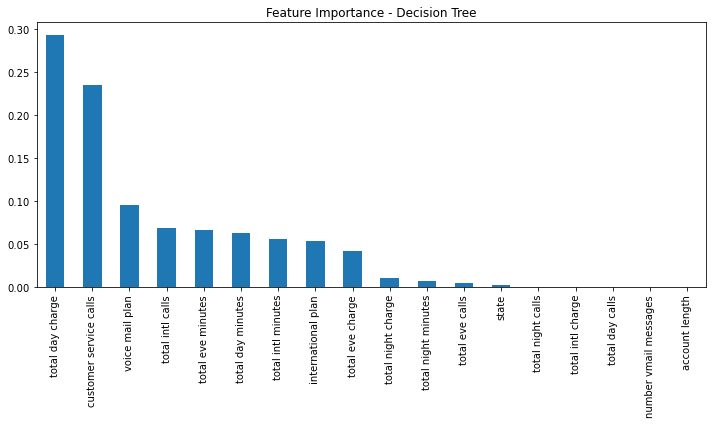

In [150]:
# 8. Feature Importance
importances = dt.feature_importances_
features = X.columns
feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
feat_imp.plot(kind="bar")
plt.title("Feature Importance - Decision Tree")
plt.tight_layout()
plt.show()

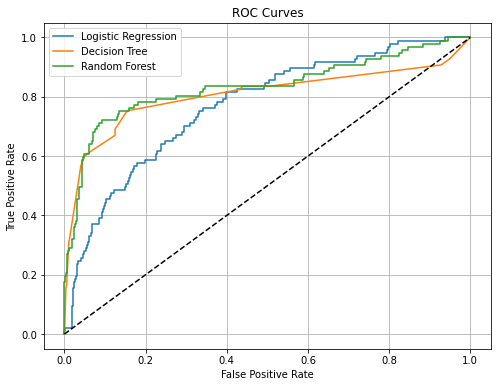

In [151]:
# 9. ROC Curves
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_proba_dt)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)

plt.figure(figsize=(8,6))
plt.plot(fpr_lr, tpr_lr, label="Logistic Regression")
plt.plot(fpr_dt, tpr_dt, label="Decision Tree")
plt.plot(fpr_rf, tpr_rf, label="Random Forest")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.grid()
plt.show()

## Conclusion
- Logistic Regression offered strong baseline performance and is easy to explain.

- Decision Tree exposed key features like customer service calls and international plan.

- Random Forest delivered higher accuracy and AUC by capturing more complex patterns.

- Feature importance plots revealed top drivers of churn.



## Recommendations
- Retention Strategy: Target users with frequent service calls and those with an international plan.

- Customer Experience: Investigate and resolve issues flagged in service calls.

- Marketing Offers: Design loyalty programs aimed at high-usage users with churn indicators.

- Model Deployment: Integrate the best model into CRM systems for real-time churn prediction.

- Monitoring: Continuously monitor model drift and retrain quarterly.

